## 한글처리

In [1]:
!apt-get -y install fonts-nanum
!fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 33 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [2]:
!ls /usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf

/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf


In [3]:
from collections import Counter
# Counter(text_split)

## 데이터 전처리

In [4]:
it_sentences = [
    "인공지능 기술이 사회의 다양한 분야에 점점 더 널리 적용되고 있다.",
    "클라우드 컴퓨팅은 데이터 저장과 처리를 더욱 효율적으로 만들어 주며, 기업의 IT 인프라를 혁신하고 있다.",
    "머신러닝과 딥러닝 알고리즘은 데이터 분석과 예측 모델링에 혁명을 일으키고 있다.",
    "블록체인 기술은 금융 거래의 투명성과 보안성을 향상시키는데 기여하고 있다.",
    "사이버 보안은 디지털 시대의 중요한 이슈로 부상하고 있으며, 지속적인 관심과 개선이 요구된다.",
    # "소프트웨어 개발에서의 애자일 방법론은 빠른 시장 변화에 효과적으로 대응할 수 있게 해준다.",
    # "데이터 과학과 분석은 비즈니스 의사 결정 과정에서 중요한 역할을 하며, 기업의 경쟁력을 강화시킨다.",
    # "사물인터넷(IoT) 기술은 일상 생활을 더욱 편리하고 연결된 공간으로 변화시키고 있다.",
    # "가상현실(VR)과 증강현실(AR) 기술은 엔터테인먼트, 교육, 의료 등 다양한 분야에서 새로운 경험을 제공한다.",
    # "파이썬은 데이터 과학, 웹 개발, 자동화 스크립트 작성 등 다양한 프로그래밍 작업에 널리 사용되는 언어이다."
]

In [5]:
text = ' '.join(it_sentences)
text_split = text.split()
text_split[:2],len(text_split)

(['인공지능', '기술이'], 55)

## wordcloud

In [6]:
from wordcloud import WordCloud

In [14]:
wordCloud = WordCloud(background_color='white', font_path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf')
# wordCloud = WordCloud(background_color='white')
wordCloud.generate_from_text(text)

In [8]:
wordCloud.words_

{'있다': 1.0,
 '데이터': 0.5,
 '인공지능': 0.25,
 '기술이': 0.25,
 '사회의': 0.25,
 '다양한': 0.25,
 '분야에': 0.25,
 '점점': 0.25,
 '더': 0.25,
 '널리': 0.25,
 '적용되고': 0.25,
 '클라우드': 0.25,
 '컴퓨팅은': 0.25,
 '저장과': 0.25,
 '처리를': 0.25,
 '더욱': 0.25,
 '효율적으로': 0.25,
 '만들어': 0.25,
 '주며': 0.25,
 '기업의': 0.25,
 '인프라를': 0.25,
 '혁신하고': 0.25,
 '머신러닝과': 0.25,
 '딥러닝': 0.25,
 '알고리즘은': 0.25,
 '분석과': 0.25,
 '예측': 0.25,
 '모델링에': 0.25,
 '혁명을': 0.25,
 '일으키고': 0.25,
 '블록체인': 0.25,
 '기술은': 0.25,
 '금융': 0.25,
 '거래의': 0.25,
 '투명성과': 0.25,
 '보안성을': 0.25,
 '향상시키는데': 0.25,
 '기여하고': 0.25,
 '사이버': 0.25,
 '보안은': 0.25,
 '디지털': 0.25,
 '시대의': 0.25,
 '중요한': 0.25,
 '이슈로': 0.25,
 '부상하고': 0.25,
 '있으며': 0.25,
 '지속적인': 0.25,
 '관심과': 0.25,
 '개선이': 0.25,
 '요구된다': 0.25}

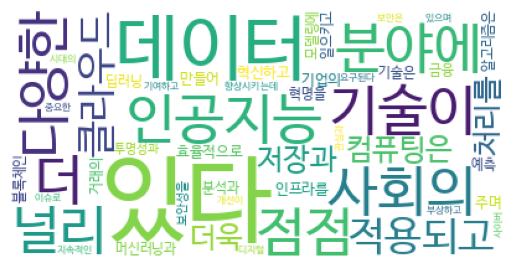

In [15]:
import matplotlib.pyplot as plt
plt.imshow(wordCloud)
plt.axis('off')
plt.show()

### 명사만 추출해 cloud에 표시

In [10]:
!pip install soynlp
# REF : https://github.com/lovit/soynlp -> Noun Extractor


In [11]:
it_sentences = [
    "인공지능 기술이 사회의 다양한 분야에 점점 더 널리 적용되고 있다.",
    "클라우드 컴퓨팅은 데이터 저장과 처리를 더욱 효율적으로 만들어 주며, 기업의 IT 인프라를 혁신하고 있다.",
    "머신러닝과 딥러닝 알고리즘은 데이터 분석과 예측 모델링에 혁명을 일으키고 있다.",
    "블록체인 기술은 금융 거래의 투명성과 보안성을 향상시키는데 기여하고 있다.",
    "사이버 보안은 디지털 시대의 중요한 이슈로 부상하고 있으며, 지속적인 관심과 개선이 요구된다."
    ]

In [16]:
from soynlp.tokenizer import RegexTokenizer
tokenizer = RegexTokenizer()
tokenizer.tokenize(it_sentences[0])

['인공지능', '기술이', '사회의', '다양한', '분야에', '점점', '더', '널리', '적용되고', '있다', '.']

In [21]:
context_text=[]
for sentences in it_sentences:
  context_text.append(tokenizer.tokenize(sentences))
context_text

[['인공지능', '기술이', '사회의', '다양한', '분야에', '점점', '더', '널리', '적용되고', '있다', '.'],
 ['클라우드',
  '컴퓨팅은',
  '데이터',
  '저장과',
  '처리를',
  '더욱',
  '효율적으로',
  '만들어',
  '주며',
  ',',
  '기업의',
  'IT',
  '인프라를',
  '혁신하고',
  '있다',
  '.'],
 ['머신러닝과',
  '딥러닝',
  '알고리즘은',
  '데이터',
  '분석과',
  '예측',
  '모델링에',
  '혁명을',
  '일으키고',
  '있다',
  '.'],
 ['블록체인', '기술은', '금융', '거래의', '투명성과', '보안성을', '향상시키는데', '기여하고', '있다', '.'],
 ['사이버',
  '보안은',
  '디지털',
  '시대의',
  '중요한',
  '이슈로',
  '부상하고',
  '있으며',
  ',',
  '지속적인',
  '관심과',
  '개선이',
  '요구된다',
  '.']]

In [23]:
from soynlp.noun import LRNounExtractor
noun_extractor = LRNounExtractor()
nouns = noun_extractor.train_extract(context_text) # list of str like

[Noun Extractor] used default noun predictor; Sejong corpus predictor
[Noun Extractor] used noun_predictor_sejong
[Noun Extractor] All 2398 r features was loaded


TypeError: expected string or bytes-like object